In [2]:
from bs4 import BeautifulSoup
from urllib.request import Request,urlopen
import pandas as pd

url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210517"
request = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(request).read()
soup = BeautifulSoup(html,"html.parser")
soup



<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210517" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [3]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31795" title="반지의 제왕: 두 개의 탑">반지의 제왕: 두 개의 탑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154573" title="다시 태어나도 우리">다시 태어나도 우리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10001" title="시네마 천국">시네마 천국</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31794" title="반지의 제왕: 반지 원정대">반지의 제왕: 반지 원정대</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basi

In [4]:
soup.find_all('div','tit5')[0].a.string

'반지의 제왕: 두 개의 탑'

In [5]:
soup.find_all("td","point")[0].string

'9.36'

In [6]:
data = pd.date_range('2021-02-01',periods=100,freq="D")
data

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
      

In [7]:
import urllib
from tqdm import tqdm_notebook

movie_data = []
movie_name = []
movie_point = []

for today in tqdm_notebook(data):
  url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
  request = Request(url.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))), headers={'User-Agent': 'Mozilla/5.0'})
  html = urlopen(request).read()
  soup = BeautifulSoup(html,"html.parser")
  end = len(soup.find_all('td','point'))
  movie_data.extend([today for n in range(0,end)])
  movie_name.extend([soup.find_all("div","tit5")[n].a.string for n in range(0,end)])
  movie_point.extend([soup.find_all("td","point")[n].string for n in range(0,end)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [8]:
movie = pd.DataFrame({"date":movie_data,"name":movie_name,"point":movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2021-02-01,극장판 바이올렛 에버가든,9.50
1,2021-02-01,가나의 혼인잔치: 언약,9.45
2,2021-02-01,언플랜드,9.42
3,2021-02-01,소울,9.40
4,2021-02-01,부활: 그 증거,9.39


In [9]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=["name"], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point',ascending=False)
movie_best.head()

,point
name,
그린 북,9.590000
디지몬 어드벤처 라스트 에볼루션 : 인연,9.556111
송가인 더 드라마,9.510000
원더,9.510000
극장판 바이올렛 에버가든,9.492289


In [10]:
tmp = movie.query('name == ["소울"]')
tmp

,date,name,point
3,2021-02-01,소울,9.40
51,2021-02-02,소울,9.38
95,2021-02-03,소울,9.37
135,2021-02-04,소울,9.38
173,2021-02-05,소울,9.38
...,...,...,...
4614,2021-05-07,소울,9.30
4664,2021-05-08,소울,9.30
4714,2021-05-09,소울,9.30
4765,2021-05-10,소울,9.30


No handles with labels found to put in legend.


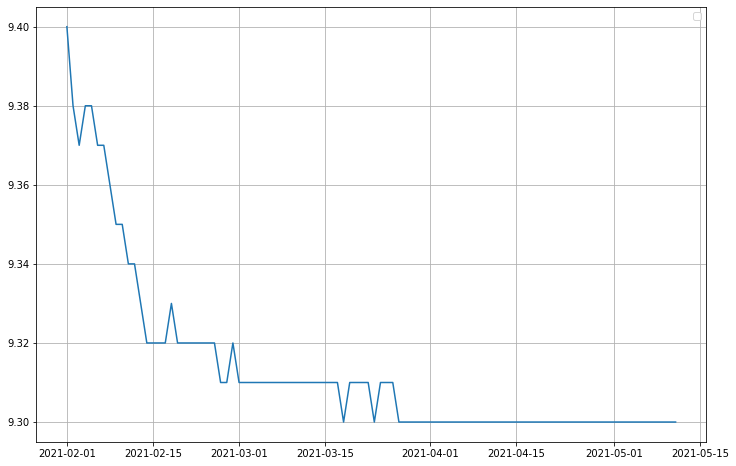

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(tmp["date"],tmp["point"])
plt.legend(loc="best")
plt.grid()
plt.show()

In [12]:
movie_pivot = pd.pivot_table(movie, index=["date"],columns=["name"],values=["point"])
movie_pivot.head()

point                          ...                       
name       120BPM 1917 가나의 혼인잔치: 언약 건축학개론  ... 해피 투게더 허트 로커 현기증  화양연화
date                                       ...                       
2021-02-01    NaN  NaN         9.45   NaN  ...  7.420   NaN NaN  8.75
2021-02-02    NaN  NaN         9.45   NaN  ...  7.420   NaN NaN  8.75
2021-02-03    NaN  NaN          NaN   NaN  ...  7.420   NaN NaN  8.76
2021-02-04    NaN  NaN         9.45   NaN  ...  8.300   NaN NaN  8.76
2021-02-05    NaN  NaN         9.45   NaN  ...  8.305   NaN NaN  8.76

[5 rows x 205 columns]

In [13]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,120BPM,1917,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,"그 시절, 우리가 좋아했던 소녀",그것만이 내 세상,그녀,그레이트 뷰티,그린 북,극장판 귀멸의 칼날: 무한열차편,극장판 바이올렛 에버가든,극장판 소드 아트 온라인 -오디널 스케일-,극장판 쿠로코의 농구 라스트 게임,기생충,"나, 다니엘 블레이크","나는 내일, 어제의 너와 만난다",나의 사적인 여자친구,날씨의 아이,남매의 여름밤,너는 여기에 없었다,너의 이름은.,너의 췌장을 먹고 싶어,노매드랜드,노바디,노예 12년,늑대소년,늑대와 춤을,다시 태어나도 우리,달라스 바이어스 클럽,"당신, 거기 있어줄래요",더 랍스터,더 박스,더 스파이,더 울프 오브 월 스트리트,더 테이블,더 포스트,...,초록물고기,초미의 관심사,초속5센티미터,최악의 하루,카오스 워킹,카페 소사이어티,캐롤,콜드 워,크루즈 패밀리: 뉴 에이지,클로저,킹 오브 프리즘,킹 오브 프리즘 프라이드 더 히어로,타오르는 여인의 초상,태풍이 지나가고,테넷,톰과 제리,팅커 테일러 솔저 스파이,파수꾼,파이터,패왕별희 디 오리지널,패터슨,퍼펙트 케어,페이트 스테이 나이트 헤븐즈필 III.스프링 송,페임,펭귄 하이웨이,폭스캐처,프란시스 하,프란츠,플로리다 프로젝트,플립,피아니스트,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리 포터와 아즈카반의 죄수,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,화양연화
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-01,NaN,NaN,9.45,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,NaN,9.29,9.5,NaN,NaN,8.49,NaN,NaN,8.2,7.98,8.95,NaN,8.79,8.22,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.36,NaN,NaN,NaN,8.59,NaN,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,7.03,NaN,NaN,NaN,8.65,NaN,NaN,NaN,9.25,NaN,NaN,NaN,8.88,7.420,NaN,NaN,8.75
2021-02-02,NaN,NaN,9.45,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,NaN,9.26,9.5,NaN,NaN,8.49,NaN,NaN,8.2,7.98,8.95,NaN,8.79,8.22,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.36,NaN,NaN,NaN,8.59,NaN,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,8.65,NaN,NaN,NaN,9.25,NaN,NaN,NaN,8.88,7.420,NaN,NaN,8.75
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,NaN,9.25,9.5,NaN,NaN,8.49,NaN,NaN,8.2,7.98,8.95,NaN,8.79,8.22,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.36,NaN,NaN,NaN,8.59,NaN,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,8.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.420,NaN,NaN,8.76
2021-02-04,NaN,NaN,9.45,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,NaN,9.24,9.5,NaN,NaN,8.49,NaN,NaN,NaN,7.98,8.95,NaN,8.79,8.22,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.36,NaN,NaN,NaN,8.59,8.26,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.300,NaN,NaN,8.76
2021-02-05,NaN,NaN,9.45,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,NaN,9.22,9.5,NaN,NaN,8.49,NaN,NaN,NaN,7.98,8.95,NaN,8.79,8.22,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.36,NaN,NaN,NaN,8.59,8.26,NaN,NaN,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.11,NaN,NaN,NaN,8.305,NaN,NaN,8.76


In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

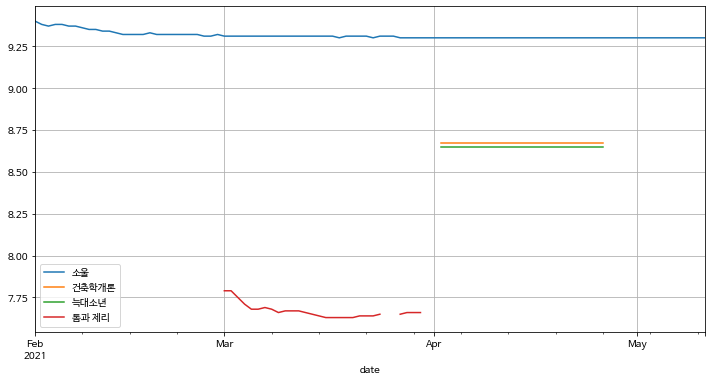

In [16]:
movie_pivot.plot(y=["소울","건축학개론","늑대소년","톰과 제리"], figsize=(12,6))
plt.legend(loc="best")
plt.grid()
plt.show()